## Plots

#### Load data

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

xls = pd.ExcelFile("full_results.xlsx")
full_results = pd.read_excel(xls, "full_results", na_values = ["#VALUE!"])


## Conformance cases analysis

Conformance case plots

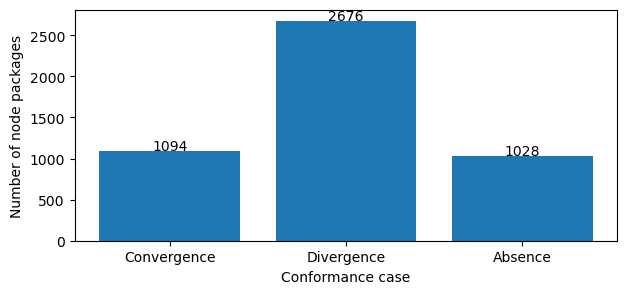

In [13]:
case_labels = ['Convergence', 'Divergence', 'Absence']

conv = int(full_results["conf_case_conv"][0])
abs = int(full_results["conf_case_abs"][0])
div = int(full_results["conf_case_div"][0])
cases = [conv, div, abs]

plt.figure(figsize=(7, 3))
plt.bar(case_labels, cases)
plt.xlabel('Conformance case')
plt.ylabel('Number of node packages')

for i, value in enumerate(cases):
    plt.text(i, value-30, str(value), ha='center', va='bottom')



plt.savefig("./figures/conformance_cases.pdf", bbox_inches='tight')
plt.show()


Plot saturation of sources and sinks

[0, 3.149606299212598, 7.086614173228346, 10.236220472440944, 11.811023622047244, 12.598425196850393, 13.385826771653544, 14.960629921259844, 14.960629921259844, 14.960629921259844, 16.535433070866144, 16.535433070866144, 18.11023622047244, 22.04724409448819, 22.04724409448819, 25.196850393700785, 25.196850393700785, 25.984251968503933, 25.984251968503933, 27.559055118110237, 28.346456692913385, 29.133858267716533, 32.28346456692913, 32.28346456692913, 32.28346456692913, 32.28346456692913, 35.43307086614173, 37.79527559055118, 37.79527559055118, 37.79527559055118, 39.37007874015748, 40.15748031496063, 40.94488188976378, 41.732283464566926, 41.732283464566926, 45.66929133858268, 47.24409448818898, 47.24409448818898, 51.96850393700787, 51.96850393700787, 54.330708661417326, 54.330708661417326, 57.48031496062992, 58.26771653543307, 58.26771653543307, 58.26771653543307, 58.26771653543307, 58.26771653543307, 60.629921259842526, 61.417322834645674, 61.417322834645674, 66.14173228346458, 66.1

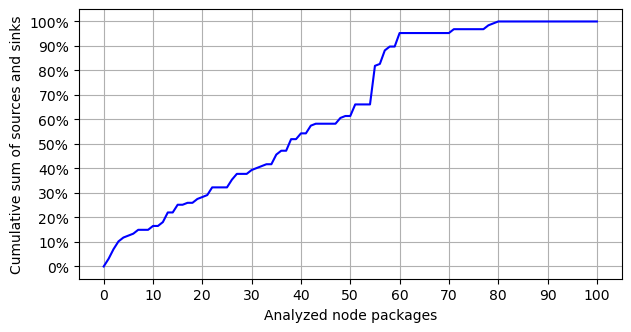

In [ ]:

def plot_cumulative_sum(numbers):
    # Calculate cumulative sum
    cumulative_sum = [sum(numbers[:i+1]) for i in range(len(numbers))]
    max_val = max(cumulative_sum)
    cumulative_sum = [(value / max_val) * 100 for value in cumulative_sum]
    cumulative_sum.insert(0, 0)
    print(cumulative_sum[:60])

    # Plot 
    plt.figure(figsize=(7, 3.5))
    plt.plot(cumulative_sum, marker='', linestyle='-', color='b', label='Cumulative sum of sources and sinks')
    plt.xlabel('Analyzed node packages')
    plt.ylabel('Cumulative sum of sources and sinks')
    plt.grid(True)

    plt.locator_params(axis='y', nbins=11)
    plt.locator_params(axis='x', nbins=11)

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val)}%'))
    
    plt.savefig("./figures/saturation_plot.pdf", bbox_inches='tight')
    plt.show()

numbers = [4, 5, 4, 2, 1, 1, 2, 0, 0, 2, 0, 2, 5, 0, 4, 0, 1, 0, 2, 1, 1, 4, 0, 0, 0, 4, 3, 0, 0, 2, 1, 1, 1, 0, 5, 2, 0, 6, 0, 3, 0, 4, 1, 0, 0, 0, 0, 3, 1, 0, 6, 0, 0, 0, 20, 1, 7, 2, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

plot_cumulative_sum(numbers)

## Number of information flows identified by CodeQL

In [ ]:
import os

codeql_results_path = "codeql_results_all_node_packages"
count = 0
for i in os.listdir(codeql_results_path):
    with open(os.path.join(codeql_results_path, i)) as ql_file:
        lines = ql_file.readlines()
    count += len(lines)
print(count)

58807


## Number of nodes per node package

133
5032


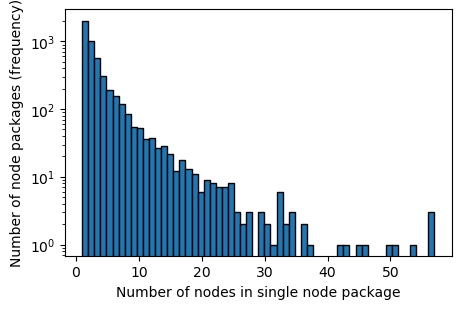

In [ ]:
with open("lists/node_numbers.txt", "r") as node_numbers_file:
    node_numbers = [int(n.strip()) for n in node_numbers_file.read().strip("[]").split(",")]
node_numbers.sort()
node_numbers.reverse()
print(node_numbers.count(0))
print(len(node_numbers))

max = 58
filtered_numbers = [x for x in node_numbers if (0 < x < max)]

plt.figure(figsize=(5, 3.2))
plt.hist(filtered_numbers, bins=max, edgecolor='black')
plt.yscale('log')
plt.xlabel('Number of nodes in single node package')
plt.ylabel('Number of node packages (frequency)')

plt.savefig("figures/node_numbers.pdf", bbox_inches='tight')
plt.show()


## Number of nodes per conformance case

In [43]:
conv_rows = full_results[full_results["conf_case"] == "convergence"]
print("Nodes in convergence case:", conv_rows["nodes"].sum())

div_rows = full_results[full_results["conf_case"] == "divergence"]
print("Nodes in divergence case:", div_rows["nodes"].sum())

abs_rows = full_results[full_results["conf_case"] == "absence"]
print("Nodes in absence case:", abs_rows["nodes"].sum())

print("Nodes per package in convergence case:", conv_rows["nodes"].sum() / conv_rows.shape[0])
print("Nodes per package in divergence case:", div_rows["nodes"].sum() / div_rows.shape[0])
print("Nodes per package in absence case:", abs_rows["nodes"].sum() / abs_rows.shape[0])

Nodes in convergence case: 2240.0
Nodes in divergence case: 10903.0
Nodes in absence case: 4807.0
Nodes per package in convergence case: 2.047531992687386
Nodes per package in divergence case: 4.063734625419307
Nodes per package in absence case: 4.6669902912621355


## Plot LOCs

('1338_@flexdash__node-red-fd-testnodes', 148397)
148397
[17011, 17672, 17879, 18934, 19105, 19950, 20049, 20422, 20517, 20613, 20822, 21061, 21518, 21991, 22544, 23272, 23469, 23808, 23808, 23814, 24829, 24838, 25230, 25518, 25560, 25772, 27984, 28095, 28112, 31913, 32535, 32923, 33405, 37125, 37453, 41695, 42249, 42976, 48842, 53462, 54267, 54269, 54346, 56229, 58110, 60091, 60112, 65250, 81177, 114110, 148397]
[ 48842  28112  65250  27984  23814  33405  17879  54346  42976  23272
  20517  17011 114110  41695  20613  19950  19105  42249  25772  25518
  17672  20422  22544  60091  60112  81177  31913  21061  18934  54267
  21518 148397  28095  37453  53462  58110  23808  32535  54269  32923
  37125  20049  24829  25230  25560  21991  20822  56229  23469  23808
  24838]


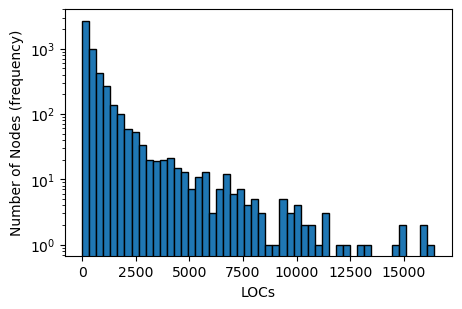

In [ ]:
import numpy as np

with open("lists/nodes_locs.txt", "r") as nodes_locs_file:
    nodes_locs = [(entry.split(",")[0], int(entry.split(",")[1].strip())) for entry in nodes_locs_file.readlines()[1:]]

nodes_locs.sort(key = lambda x: int(x[0].split('_')[0]))

for n in nodes_locs:
    if n[1] == 148397:
        print(n)
print(max([b for (a,b) in nodes_locs]))

nodes, locs = zip(*nodes_locs)

loc = np.array(locs)

# Exclude outliers based on the 1st and 99th percentiles
lower_bound = np.percentile(loc, 1)
upper_bound = np.percentile(loc, 99)
filtered_loc = loc[(loc <= upper_bound)] #(loc >= lower_bound) & 
higher_locs = loc[(loc>upper_bound)]
print(sorted(higher_locs))
print(higher_locs)

plt.figure(figsize=(5, 3.2))
plt.hist(filtered_loc, bins=50, edgecolor='black')  # Adjust bins for desired granularity

plt.yscale("log")
plt.xlabel("LOCs")
plt.ylabel("Number of Nodes (frequency)")


plt.savefig("figures/LOCs_per_node.pdf", bbox_inches='tight')
plt.show()




## LOC per conformance case

In [46]:
conv_rows = full_results[full_results["conf_case"] == "convergence"]
print("LOC in convergence case:", conv_rows["LOCs"].sum())

div_rows = full_results[full_results["conf_case"] == "divergence"]
print("LOC in divergence case:", div_rows["LOCs"].sum())

abs_rows = full_results[full_results["conf_case"] == "absence"]
print("LOC in absence case:", abs_rows["LOCs"].sum())

print("LOC per package in convergence case:", conv_rows["LOCs"].sum() / conv_rows.shape[0])
print("LOC per package in divergence case:", div_rows["LOCs"].sum() / div_rows.shape[0])
print("LOC per package in absence case:", abs_rows["LOCs"].sum() / abs_rows.shape[0])

print("LOC per node in convergence case:", conv_rows["LOCs"].sum() / (conv_rows.shape[0] * 2.047531992687386))
print("LOC per node in divergence case:", div_rows["LOCs"].sum() / (div_rows.shape[0] * 4.063734625419307))
print("LOC per node in absence case:", abs_rows["LOCs"].sum() / (abs_rows.shape[0] * 4.6669902912621355))


# node per package for each conformance case:
# 2.047531992687386
# 4.063734625419307
# 4.6669902912621355

LOC in convergence case: 295944.0
LOC in divergence case: 4001446.0
LOC in absence case: 978738.0
LOC per package in convergence case: 270.5155393053017
LOC per package in divergence case: 1491.4073797987328
LOC per package in absence case: 950.2310679611651
LOC per node in convergence case: 132.11785714285713
LOC per node in divergence case: 367.0041273044116
LOC per node in absence case: 203.6068233825671


## Number of additional sources and sinks

Average additional sources & sinks:  8.437786259541985
Average additional sources:  2.866965620328849
Average additional sinks:  5.311285500747384
[71.0, 73.0, 75.0, 76.0, 78.0, 82.0, 85.0, 85.0, 85.0, 86.0, 100.0, 101.0, 103.0, 110.0, 114.0, 121.0, 125.0, 140.0, 143.0, 147.0, 154.0, 157.0, 159.0, 163.0, 193.0, 194.0, 556.0]
27


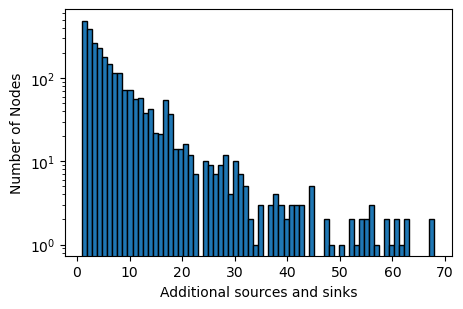

In [ ]:

div_rows = full_results[full_results["conf_case"] == "divergence"]

additional_sources = div_rows["div_in"].to_list()
additional_sinks = div_rows["div_out"].to_list()
additional_sum = result = [sources + sinks for sources, sinks in zip(additional_sources, additional_sinks) if sources + sinks > 0]

print("Average additional sources & sinks: ", sum(additional_sum) / len(additional_sum))
print("Average additional sources: ", sum(additional_sources) / len(additional_sources))
print("Average additional sinks: ", sum(additional_sinks) / len(additional_sinks))

array_numbers = np.array(additional_sum)
lower_bound = np.percentile(array_numbers, 1)
upper_bound = np.percentile(array_numbers, 99)

filtered_numbers = array_numbers[(array_numbers <= upper_bound)]
filtered_numbers = filtered_numbers[(filtered_numbers >= lower_bound)]

higher_numbers = array_numbers[(array_numbers>upper_bound)]
print(sorted(higher_numbers))
print(len(higher_numbers))

plt.figure(figsize=(5, 3.2))
plt.hist(filtered_numbers, bins=70, edgecolor='black')

plt.yscale("log")
plt.xlabel("Additional sources and sinks")
plt.ylabel("Number of Nodes")

plt.savefig("./figures/additional_ports_plot.pdf", bbox_inches='tight')
plt.show()

## Execution times

NameError: name 'cases' is not defined

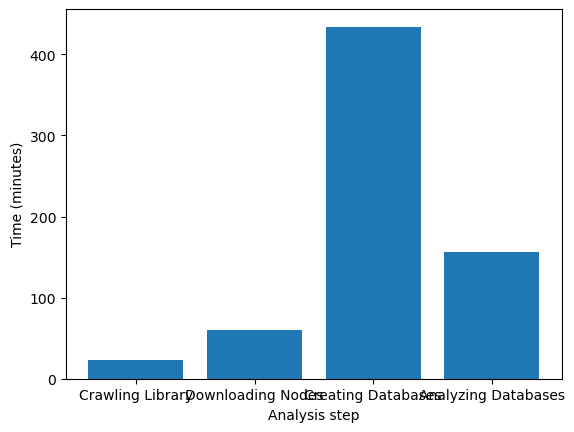

In [ ]:
# detailed cases
steps = ["Crawling Library", "Downloading Nodes", "Creating Databases", "Analyzing Databases"]
times = [23, 60, 434, 156]


plt.bar(steps, times)
plt.xlabel('Analysis step')
plt.ylabel('Time (minutes)')

plt.savefig("execution_times.png")
plt.show()